# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [2]:
# Add your imports here
import pandas as pd
import os
import numpy as np
import matplotlib as plt
from datetime import datetime, date, time

In [3]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [4]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [5]:
# Write your code here

"""
Add the datafolder path and the extension .csv.zip to the given filename
"""
def format_path(name):
    return os.path.join(LEGO_DATA_FOLDER, '{}.csv.zip'.format(name))

# Import each csv into a dataframe, taking the first column (id) as the index colum
colors = pd.read_csv(format_path('colors'))
inventories = pd.read_csv(format_path('inventories'))
inventory_parts = pd.read_csv(format_path('inventory_parts'))
inventory_sets = pd.read_csv(format_path('inventory_sets'))
part_categories = pd.read_csv(format_path('part_categories'))
parts = pd.read_csv(format_path('parts'))
sets = pd.read_csv(format_path('sets'))
themes = pd.read_csv(format_path('themes'))

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [6]:
# Write your code here
## Cleaning invertory_parts
# We choose to not count the average of the rows where we don't have correct values of the quantity
inventory_parts.replace(-np.inf, np.nan, inplace=True)
average = inventory_parts['quantity'].mean()
        
## Cleaning sets
# Replace 70s to 1970 and 80s to 1980 
sets.replace({'70s': '1970', '80s': '1980'}, inplace=True)
# Convert all the years in str to int64
sets.year = pd.to_numeric(sets.year)
# Put all the years to positive numbers
sets.year = sets.year.abs()
# Drop the last digit of all the years with 5 digits (ex. 19888 -> 1988)
sets.year = sets.year.astype(str).apply(lambda x: x[:4]).astype(int)

__\* Approach \*__
I print the sets: year column and the inventory_parts: quantity columns, and I saw that not every row of the data makes sense. For instance, I could see '70s' (an epoch) in the year column, and years with negative values, also years that are too big (ex. 19888) which result from typos. I print the type of the values in this column, and it turns out that it was a series of 'string' instead of numbers (probably because of the presence of '70s', which is interpreted as a string).
For the inventory_sets, I can observe that there are many '-inf', where the number is minus infinite. It doesn't make sens as  

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. Do you see a trend over the last years? How do you interpret it?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


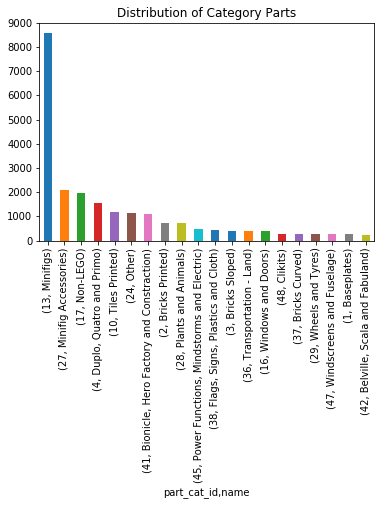

In [25]:
# Write your code here
# 1.find all the lines with car/Car/cars/Cars using a regular expression
cars_df = sets[sets.name.str.contains(" (c|C)ar(s|$|\s)", regex=True)]

# 2. plot distribution of part categories
# Merge the parts without the name colum (we don't want parts name), with categories
parts_df = pd.merge(parts[['id', 'part_cat_id']], part_categories, left_on=['part_cat_id'], right_on=['id'], how='outer')
# Group by part_cat_id (and its specific name, which doesn't have any effect on the grouping), and get the top 20 largest counts of parts
counts_by_parts_df = parts_df.groupby(['part_cat_id', 'name']).size().nlargest(20)
counts_by_parts_df.plot(x='name', y='counts', kind='bar', title='Distribution of Category Parts')

In [8]:
# 3. Find the dominant color of each set. 
# Then, plot using a (horizontal) bar chart, 
# the number of sets per dominant color. 
# Color each bar with the respective color that it represents.

#---
# rename to differentiate between inventories
inventory_sets_renamed = inventory_sets.rename(index=str, columns={"quantity": "inventory quantity"})
inventory_parts_renamed = inventory_parts.rename(index=str, columns={"quantity": "part quantity"})

# match color_id with inventory_sets
sets_with_color = pd.merge(inventory_sets_renamed, inventory_parts_renamed[['inventory_id', 'color_id', 'part_id', 'part quantity']], how='inner').dropna()
# drop all rows with only color infos
sets_with_color_names = pd.merge(sets_with_color, colors[['id', 'rgb', 'name']], left_on=['color_id'], right_on=['id'], how='inner').dropna()

# calculate total number of parts per set
sets_with_color_names['total number of parts per set'] = sets_with_color_names['part quantity'] * sets_with_color_names['inventory quantity']

sets_with_color_counts = sets_with_color_names.groupby(['set_id', 'color_id', 'name', 'rgb'])['total number of parts per set'].sum().reset_index(name='count')

dominant_color_per_set = sets_with_color_counts.iloc[sets_with_color_counts.groupby(['set_id']).apply(lambda x: x['count'].idxmax())]
nb_sets_per_dominant_color = dominant_color_per_set.groupby(['rgb', 'name'])['set_id'].size()

color_list = nb_sets_per_dominant_color.reset_index(name='Set per color')
color_rgb = ['#' + color for color in color_list['rgb']]
graph = nb_sets_per_dominant_color.plot(x='name', kind='barh', color=color_rgb, title='Set Distribution of Each Colour')
graph
graph.set_facecolor('#e6e6fa')
#dominant_color_per_set.sort_values(by=['rgb', 'name'])
#sets_with_color_counts[sets_with_color_counts.isnull().any(axis=1)]
dominant_color_per_set
#sets_with_color_names[sets_with_color_names['set_id']=='1062-1']
#sets_with_color[sets_with_color['set_id']=='10173-1']



,set_id,color_id,name,rgb,count
0,10127-1,9999,[No Color],05131D,4.0
2,10173-1,72,Dark Bluish Gray,6C6E68,16.0
3,10194-1,9999,[No Color],05131D,1.0
4,10233-1,9999,[No Color],05131D,1.0
8,1062-1,15,White,FFFFFF,62.0
16,1064-1,15,White,FFFFFF,62.0
21,11905-1,9999,[No Color],05131D,1.0
22,1417-2,4,Red,C91A09,1.0
24,2995-1,89,Royal Blue,4C61DB,1.0
25,2996-1,89,Royal Blue,4C61DB,1.0


,id,year,set_id,color_id,name,rgb,count,R2,G2,B2
21,346-2,1969,346-2,2,Green,237841,3.0,1225,14400,4225
20,344-1,1969,344-1,2,Green,237841,3.0,1225,14400,4225
22,347-1,1970,347-1,2,Green,237841,3.0,1225,14400,4225
34,603-3,1970,603-3,2,Green,237841,3.0,1225,14400,4225
4,1062-1,1980,1062-1,15,White,FFFFFF,62.0,65025,65025,65025
165,k1062b,1981,k1062b,15,White,FFFFFF,62.0,65025,65025,65025
10,322-1,1981,322-1,4,Red,C91A09,1.0,40401,676,81
166,pk1062,1981,pk1062,15,White,FFFFFF,62.0,65025,65025,65025
5,1064-1,1981,1064-1,15,White,FFFFFF,62.0,65025,65025,65025
162,9750-1,1986,9750-1,9999,[No Color],05131D,9.0,25,361,841


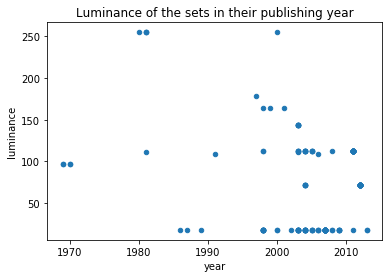

In [9]:
# 4. Create a scatter plot of the luminance* of the sets vs their publishing year. 
# What do you observe for the years 1980-1981? How do you interpret what you see?
#sets['luminance'] = sets.apply(lambda row: np.sqrt(0.299* R**2 + 0.587* G**2 + 0.114*G**2) row[''])

# sets_year_with_inventory_id = pd.merge(sets[['id', 'year']], inventory_sets[['inventory_id', 'set_id']], left_on=['id'], right_on=['set_id'], how='inner')
# sets_year_with_color = pd.merge(sets_year_with_inventory_id, inventory_parts[['inventory_id', 'color_id']], how='inner')
# sets_year_with_color_rgb = pd.merge(sets_year_with_color, colors[['id', 'rgb']], left_on=['color_id'], right_on=['id'], how='inner')

dominant_color_per_set_year = pd.merge(sets[['id', 'year']], dominant_color_per_set, left_on=['id'], right_on=['set_id'], how='right')

# extract 0:2, 2:4 and 4:6 of rgb into R, G, B arrays interpreted as int of base 16 (hexadecimal)
dominant_color_per_set_year['R2'] = dominant_color_per_set_year['rgb'].apply(lambda color: int(color[0:2], 16)**2)
dominant_color_per_set_year['G2'] = dominant_color_per_set_year['rgb'].apply(lambda color: int(color[2:4], 16)**2)
dominant_color_per_set_year['B2'] = dominant_color_per_set_year['rgb'].apply(lambda color: int(color[4:6], 16)**2)


#sets_year_color_count = sets_year_with_color_rgb.groupby(['set_id', 'rgb']).size().reset_index(name='color count')
#sets_year_color_count
#sets_color = sets_year_color_count.groupby(['set_id']).apply(lambda x: x.loc[x['color count'] == x['color count'].max()])
luminance_year = dominant_color_per_set_year['year'].copy().to_frame()
luminance_year['luminance'] = np.sqrt(0.299*dominant_color_per_set_year['R2'] + 0.587*dominant_color_per_set_year['G2'] + 0.114*dominant_color_per_set_year['B2'])
#luminance_year = luminance_year.drop_duplicates()

luminance_year.plot(x='year', y='luminance', kind='scatter', title='Luminance of the sets in their publishing year')
dominant_color_per_set_year.sort_values(by='year')

__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [10]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [11]:
# Write your code here
# Knowing that there is only one file, I can use a for loop that will 
# just search for the only file in the folder and read it
for file in os.listdir(BIKES_DATA_FOLDER):
    bike_file = pd.read_json(os.path.join(BIKES_DATA_FOLDER, file))

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [12]:
# Write your code here
trip_route_category = pd.Categorical(bike_file['Trip Route Category'])
passholder_type = pd.Categorical(bike_file['Passholder Type'])
bike_file['Trip Route Category'] = bike_file['Trip Route Category'].astype('category')
bike_file['Passholder Type'] = bike_file['Passholder Type'].astype('category')

# Separate passholder type and Plan duration into another dataframe
passholder_type_duration = bike_file[['Passholder Type', 'Plan Duration']].drop_duplicates(subset='Passholder Type')

In [13]:
# Separate trip_duration into another dataframe
trip_duration = bike_file[['Trip ID', 'Start Time', 'End Time', 'Duration']]
trip_duration = trip_duration.sort_values(by='Trip ID').reset_index(drop=True)
# Convert time into real time
trip_duration['Start Time'] = pd.to_datetime(trip_duration['Start Time'])
trip_duration['End Time'] = pd.to_datetime(trip_duration['End Time'])
# Verify the Duration is all good
trip_duration['Real Duration'] = (trip_duration['End Time'] - trip_duration['Start Time']).dt.total_seconds()
trip_duration['Real Duration'] = trip_duration['Real Duration'].astype(int)

trip_duration.loc[(trip_duration['Duration']!=trip_duration['Real Duration']) & (trip_duration['Duration']!=86400)]

,Trip ID,Start Time,End Time,Duration,Real Duration
76673,12517325,2016-11-06 00:32:00,2016-11-06 11:12:00,42000,38400
76826,12531865,2016-11-05 23:45:00,2016-11-06 14:11:00,55560,51960
76827,12531961,2016-11-05 19:59:00,2016-11-06 14:47:00,71280,67680
123234,21893148,2017-03-12 01:55:00,2017-03-12 03:36:00,2460,6060
123474,21945889,2017-03-12 01:14:00,2017-03-12 17:53:00,56340,59940
123521,21949898,2017-03-12 01:58:00,2017-03-12 18:06:00,54480,58080


### Inconsistencies

1. The trips are never over 24h. The highest values found is 86400.
2. Some of the trips duration are not correctly calculated, as shown previously (ex. for trip ID 12517325, the duration between 00:32:00 and 11:12:00 of the same day should be 10.67 hours (38400 seconds), but the given duration is 11.76 hours).

In [88]:
# Get all stations informations
starting_stations = bike_file[['Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude']]
starting_stations = starting_stations.rename(index=str, columns={"Starting Station ID": "Station ID", "Starting Station Latitude": "Station Latitude", "Starting Station Longitude":"Station Longitude"})
ending_stations = bike_file[['Ending Station ID', 'Ending Station Latitude', 'Ending Station Longitude']]
ending_stations = ending_stations.rename(index=str, columns={"Ending Station ID": "Station ID", "Ending Station Latitude": "Station Latitude", "Ending Station Longitude":"Station Longitude"})
stations = pd.concat([starting_stations, ending_stations], axis=0, sort=True)

stations.loc[stations['Station ID'] == 3005].drop_duplicates().head()

,Station ID,Station Latitude,Station Longitude
25,3005.0,34.04855,-118.259050
55509,3005.0,34.04855,-118.259048


We need to drop duplicates not only when the 3 values (Station ID, Latitude, Longitude) are the same, but by filtering the Station ID. Some records of the Latitude and Longitude for the same station are not exactly the same, as we can see for Station 3005. The longitude is slightly off in the 55509th record.

In [89]:
stations = stations.drop_duplicates(subset='Station ID').dropna(how='all').sort_values(by='Station ID').reset_index(drop=True)
stations['Station ID'] = stations['Station ID'].astype(int)
stations

,Station ID,Station Latitude,Station Longitude
0,3000,NaN,NaN
1,3005,34.048550,-118.259050
2,3006,34.045540,-118.256670
3,3007,34.050480,-118.254590
4,3008,34.046612,-118.262730
5,3009,33.987381,-118.472832
6,3010,34.037048,-118.254870
7,3011,34.041130,-118.267980
8,3014,34.056610,-118.237210
9,3016,34.052898,-118.241560


In [90]:
bike_file.drop(columns=['Plan Duration', 'Duration', 'Starting Station Latitude', 'Starting Station Longitude', 'Ending Station Latitude', 'Ending Station Longitude'], inplace=True)

In [91]:
bike_file = bike_file[['Bike ID', 'Trip ID', 'Start Time', 'End Time', 'Starting Station ID', 'Ending Station ID', 'Trip Route Category', 'Passholder Type']]
#bike_file['Bike ID'] = bike_file['Bike ID'].astype(int)
#bike_file['Starting Station ID'] = bike_file['Starting Station ID'].astype(int)
#bike_file['Ending Station ID'] = bike_file['Ending Station ID'].astype(int)
bike_file[bike_file.isnull().any(axis=1)]

,Bike ID,Trip ID,Start Time,End Time,Starting Station ID,Ending Station ID,Trip Route Category,Passholder Type
56613,5908.0,8640407,2016-10-03T08:35:00,2016-10-03T09:22:00,3062.0,NaN,One Way,Staff Annual
57256,6566.0,8772191,2016-10-04T08:37:00,2016-10-04T12:06:00,3062.0,NaN,One Way,Staff Annual
57885,6273.0,8877694,2016-10-05T08:38:00,2016-10-05T09:31:00,3062.0,NaN,One Way,Staff Annual
60485,6437.0,9378284,2016-10-09T09:40:00,2016-10-09T09:41:00,NaN,NaN,One Way,Staff Annual
60535,5836.0,9393909,2016-10-09T11:53:00,2016-10-09T12:40:00,3064.0,NaN,One Way,Monthly Pass
60553,6084.0,9393894,2016-10-09T12:30:00,2016-10-09T12:50:00,3036.0,NaN,One Way,Monthly Pass
60555,6479.0,9393893,2016-10-09T12:31:00,2016-10-09T12:43:00,3038.0,NaN,One Way,Monthly Pass
60568,6084.0,9399178,2016-10-09T12:57:00,2016-10-09T13:10:00,NaN,3036.0,One Way,Monthly Pass
60569,6679.0,9399177,2016-10-09T13:00:00,2016-10-09T13:15:00,3030.0,NaN,One Way,Monthly Pass
60576,6437.0,9399168,2016-10-09T13:27:00,2016-10-09T13:59:00,NaN,3064.0,One Way,Monthly Pass


__\* Briefly explain your approach here \*__

The 'Duration' column depends on 'Start Time' and 'End Time'. 
Trip category depends on Starting Station ID (long & lat, and id) and Ending Station ID.
The Starting Station Latitude & Longitude and Ending Station Latitude Longitude depend on the Starting and Ending Station ID.
The Plan duration depends on Passholder type.

Trip round type and Passholder Type are categorical.

The dataframes: 

bike_file: Bike ID', 'Trip ID', 'Start Time', 'End Time', 'Starting Station ID', 'Ending Station ID', 'Trip Route Category', 'Passholder Type'

stations: Station ID, Station Latitude, Station Longitude

trip_duration: Trip ID, Start Time, End Time, Duration, Real Duration

plan : Plan, Plan Duration

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

,Starting Station ID,count
0,3000.0,29
1,3005.0,4883
2,3006.0,2708
3,3007.0,2785
4,3008.0,2156


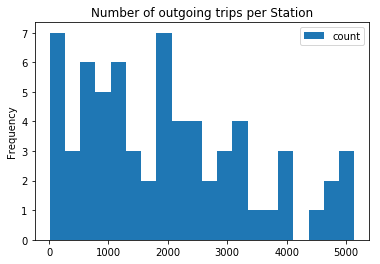

In [92]:
# Write your code here
# 1. Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins 
# (Hint: each bin describes a range of counts, not stations).
trip_starting_station = bike_file[['Trip ID', 'Starting Station ID']]
trip_starting_station_counts = trip_starting_station.groupby(['Starting Station ID']).size().reset_index(name='count')
trip_starting_station_counts.plot(x='Starting Station ID', kind='hist', bins=20, title='Number of outgoing trips per Station')
trip_starting_station_counts.head()

__\* Question 1 \*__
We group the trips by their Starting Station ID and count how many trips depart from each station(i.e. the number of outgoing trips). This gives the dataframe shown above. We plot the histogram accordingly by bins of 20 (i.e. Trips outgoing from Stations 0-20, 20-40, etc.)

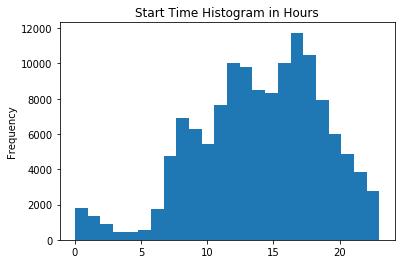

In [102]:
# 2. Plot histograms for the duration and trip starting hour in the day attributes. 
# For both the duration and the trip starting hour use discrete 1-hour intervals. 
# What do you observe in each plot? What are some popular values in the duration plot? 
# Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior.

trip_duration['Duration in hours'] = trip_duration['Real Duration'] / 3600
trip_duration['Start Time in hours'] = trip_duration['Start Time'].apply(lambda x: x.hour)
trip_duration['Start Time in hours'].plot(kind="hist", bins=24, title="Start Time Histogram in Hours")

,Trip ID,Duration,Real Duration,Duration in hours,Start Time in hours
count,1.324270e+05,132427.000000,132427.000000,132427.000000,132427.000000
mean,1.153001e+07,1555.301562,1691.324277,0.469812,14.069895
std,6.369462e+06,5814.241813,8647.333445,2.402037,4.949172
min,1.912818e+06,60.000000,60.000000,0.016667,0.000000
25%,5.060814e+06,360.000000,360.000000,0.100000,11.000000
50%,1.043827e+07,600.000000,600.000000,0.166667,14.000000
75%,1.720633e+07,1080.000000,1080.000000,0.300000,18.000000
max,2.379422e+07,86400.000000,491280.000000,136.466667,23.000000


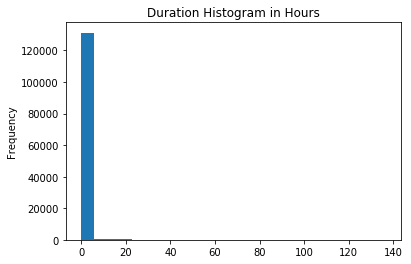

In [108]:
trip_duration['Duration in hours'].plot(kind="hist", bins=24, title="Duration Histogram in Hours")
trip_duration.describe()

,Trip ID,Start Time,End Time,Duration,Real Duration,Duration in hours,Start Time in hours
62599,9816987,2016-10-13 00:39:00,2016-10-13 00:40:00,60,60,0.016667,0
70480,11343013,2016-10-26 00:25:00,2016-10-26 00:26:00,60,60,0.016667,0
72746,11732212,2016-10-30 00:17:00,2016-10-30 00:18:00,60,60,0.016667,0
74155,12028261,2016-11-02 00:15:00,2016-11-02 00:16:00,60,60,0.016667,0
79807,13114748,2016-11-12 00:35:00,2016-11-12 00:36:00,60,60,0.016667,0
81457,13427277,2016-11-15 00:27:00,2016-11-15 00:28:00,60,60,0.016667,0
83008,13733792,2016-11-18 00:37:00,2016-11-18 00:38:00,60,60,0.016667,0
106315,18617144,2017-01-26 00:58:00,2017-01-26 00:59:00,60,60,0.016667,0
2708,2821360,2016-07-14 00:39:00,2016-07-14 00:41:00,120,120,0.033333,0
3764,3217874,2016-07-16 00:22:00,2016-07-16 00:24:00,120,120,0.033333,0


Passholder Type,Flex Pass,Monthly Pass,Staff Annual,Walk-up
Trip Route Category,,,,
One Way,0.075509,0.648033,0.002499,0.273959
Round Trip,0.037779,0.295033,0.006492,0.660696


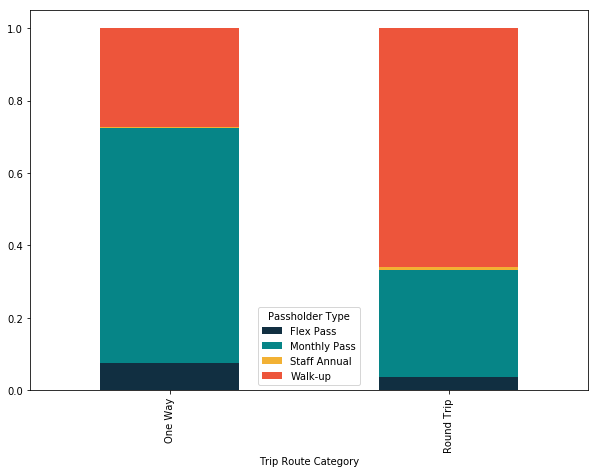

In [122]:
# 3. For each trip route category, calculate the proportion of trips
# by passholder type and present your results in a stacked bar chart
# with normalized height.

passholder_counts_by_trip_cat = bike_file.groupby(['Trip Route Category', 'Passholder Type']).size()
passholder_proportion_by_trip_cat = passholder_counts_by_trip_cat.groupby(['Trip Route Category']).apply(lambda x: x/x.sum()).reset_index(name='proportion')
pivot_df = passholder_proportion_by_trip_cat.pivot(index='Trip Route Category', columns='Passholder Type', values='proportion')


colors = ["#112F41", "#068587","#F2B134","#ED553B"]
pivot_df.loc[:,['Flex Pass','Monthly Pass', 'Staff Annual', 'Walk-up']].plot.bar(stacked=True, color=colors, figsize=(10,7))
pivot_df

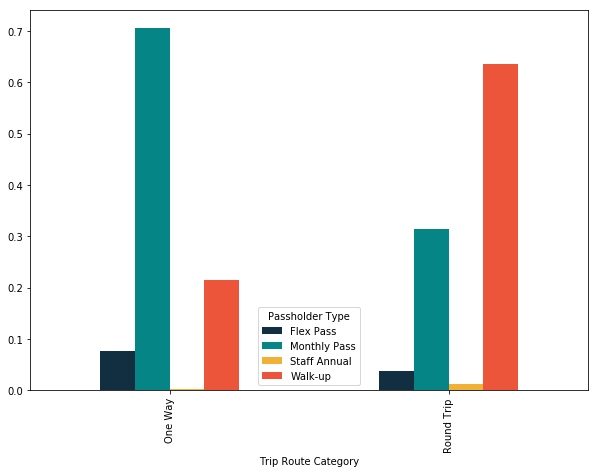

In [139]:

bikes_trips = pd.merge(trip_duration, bike_file[['Trip ID', 'Passholder Type', 'Trip Route Category']], how='left')
bikes_filter = bikes_trips[bikes_trips["Start Time in hours"] < 12]
temp = bikes_filter.groupby(['Trip Route Category', 'Passholder Type']).size()
temp2 = temp.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')

pivot_df = temp2.pivot(index='Trip Route Category', columns='Passholder Type', values='proportion')
pivot_df.loc[:,['Flex Pass','Monthly Pass', 'Staff Annual', 'Walk-up']].plot.bar(stacked=False, color=colors, figsize=(10,7))

In [140]:
bikes_interval = bikes_trips[bikes_trips[]]

,Trip ID,Start Time,End Time,Duration,Real Duration,Duration in hours,Start Time in hours,Passholder Type,Trip Route Category
0,1912818,2016-07-07 04:17:00,2016-07-07 04:20:00,180,180,0.050000,4,Monthly Pass,Round Trip
1,1919661,2016-07-07 06:00:00,2016-07-07 06:33:00,1980,1980,0.550000,6,Monthly Pass,Round Trip
2,1933383,2016-07-07 10:32:00,2016-07-07 10:37:00,300,300,0.083333,10,Flex Pass,Round Trip
3,1940317,2016-07-07 12:51:00,2016-07-07 12:58:00,420,420,0.116667,12,Walk-up,Round Trip
4,1943980,2016-07-07 13:50:00,2016-07-07 13:59:00,540,540,0.150000,13,Monthly Pass,One Way
5,1943981,2016-07-07 13:49:00,2016-07-07 13:56:00,420,420,0.116667,13,Monthly Pass,Round Trip
6,1943982,2016-07-07 13:42:00,2016-07-07 13:56:00,840,840,0.233333,13,Monthly Pass,One Way
7,1943988,2016-07-07 13:41:00,2016-07-07 13:45:00,240,240,0.066667,13,Monthly Pass,Round Trip
8,1944025,2016-07-07 13:32:00,2016-07-07 13:41:00,540,540,0.150000,13,Monthly Pass,One Way
9,1944030,2016-07-07 13:22:00,2016-07-07 13:24:00,120,120,0.033333,13,Monthly Pass,Round Trip
